In [4]:
pip install keras


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ------------------------- -------------- 0.8/1.2 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.8/3.0 MB 2.0 MB/s eta 0:00:02
   ----------------- ---------------------- 1.3/3.0 MB 2.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.6/3.0 MB 2.2 MB/s eta 0:00:01
   --------------------------- ------------ 2.1/3.0 MB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 2.9/3.0 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached grpcio-1.68.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached charset_normalizer-3.4.0-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from keras.models import Model, Sequential
from keras.layers import Dense, Input
import seaborn as sns

In [14]:
# Select numerical columns
numerical_cols = ['Average Medicare Allowed Amount',
                  'Average Submitted Charge Amount',
                  'Average Medicare Payment Amount',
                  'Average Medicare Standardized Amount']

In [16]:
# Load dataset
file_path = "Dl_project/Healthcare Providers.csv"  # Update with your file path if running locally
data = pd.read_csv(file_path)
data_numeric = data[numerical_cols].replace(',', '', regex=True).astype(float)

In [17]:
# Handle missing values
data_numeric.fillna(data_numeric.median(), inplace=True)

In [18]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [19]:
# Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(data_scaled)
data['Outlier'] = (outlier_pred == -1).astype(int)

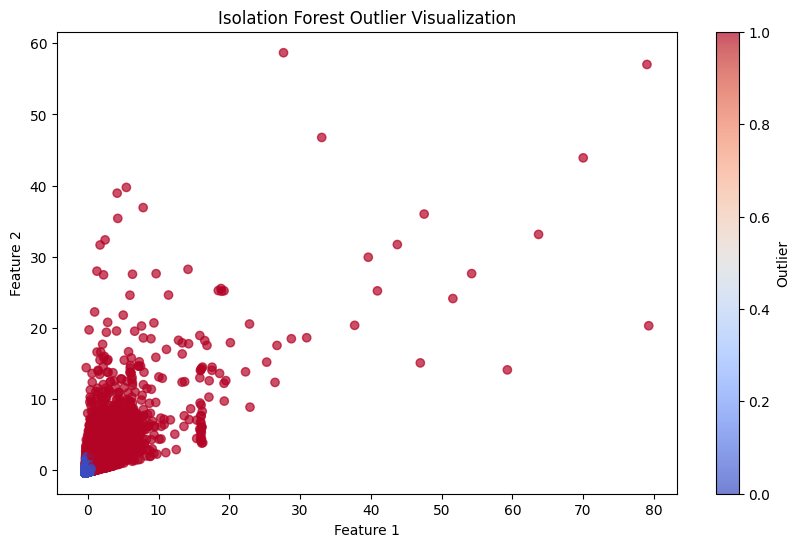

In [20]:
# Visualization of Outliers using Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Outlier'], cmap='coolwarm', alpha=0.7)
plt.title('Isolation Forest Outlier Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Outlier')
plt.show()

C:\Users\RAMANA JSRA\AppData\Local\Temp\ipykernel_11808\3563571869.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\RAMANA JSRA\AppData\Local\Temp\ipykernel_11808\3563571869.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\RAMANA JSRA\AppData\Local\Temp\ipykernel_11808\3563571869.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
C:\Users\RAMANA JSRA\AppData\Local\Temp\ipykernel_11808\3563571869.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotat

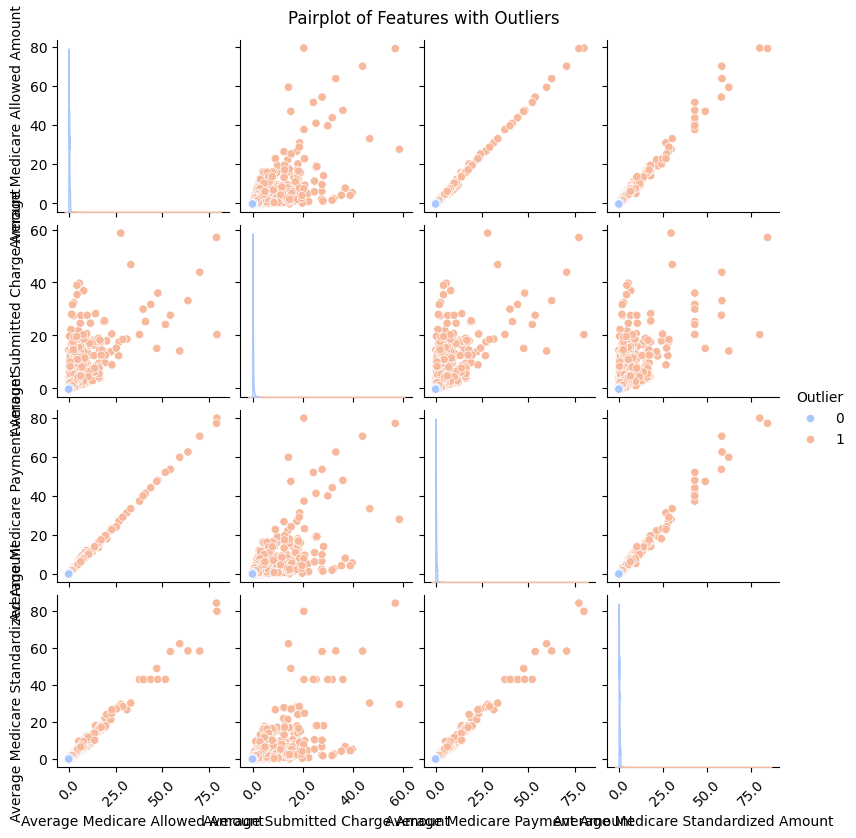

In [22]:
# Visualization using Pairplot
pairplot_data = pd.DataFrame(data_scaled, columns=numerical_cols).assign(Outlier=data['Outlier'])
g = sns.pairplot(data=pairplot_data, hue='Outlier', palette='coolwarm', diag_kind='kde', height=2)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
g.fig.suptitle('Pairplot of Features with Outliers', y=1.02)
plt.show()

In [23]:
# Autoencoder for Advanced Modeling
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))

In [25]:
# Encoder
encoder = Dense(16, activation='relu')(input_layer)
encoder = Dense(8, activation='relu')(encoder)

In [26]:
# Decoder
decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

In [28]:
# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')


In [29]:
# Train Autoencoder
history = autoencoder.fit(
    data_scaled, data_scaled,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1280 - val_loss: 0.8515
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9146 - val_loss: 0.8409
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7142 - val_loss: 0.8382
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7472 - val_loss: 0.8375
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0104 - val_loss: 0.8373
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5863 - val_loss: 0.8371
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7238 - val_loss: 0.8371
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7282 - val_loss: 0.8370
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7687 - val_loss: 0.8370
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9245 - val_loss: 0.8369
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8082 - val_loss: 0.8369
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

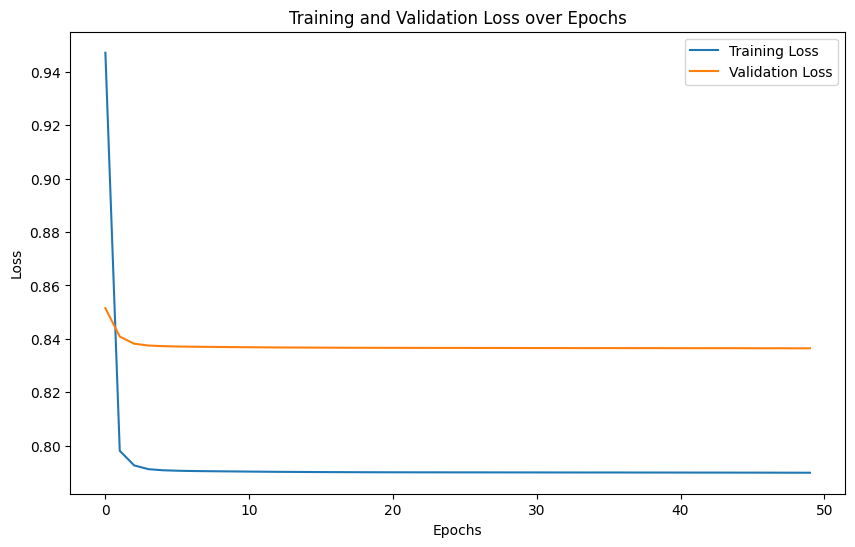

In [30]:
# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Reconstruction Error
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)
thresh = np.percentile(mse, 95)
data['Autoencoder_Outlier'] = (mse > thresh).astype(int)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step


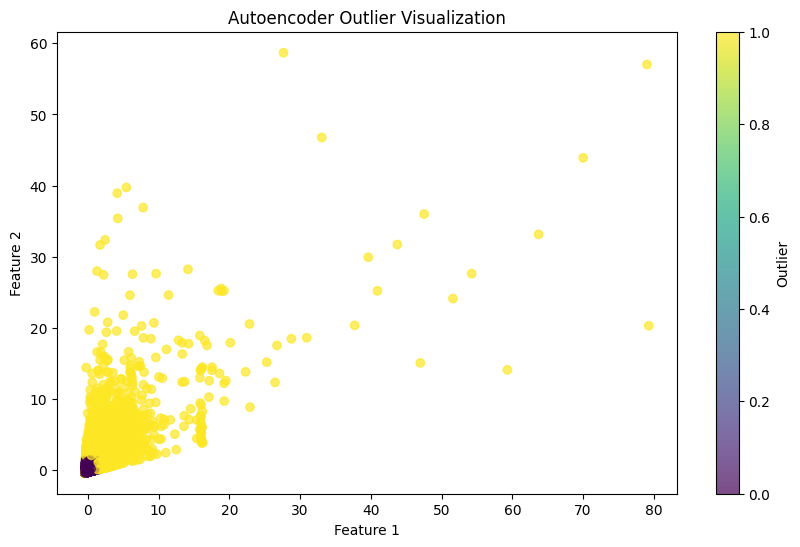

In [32]:
# Visualization of Autoencoder Outliers using Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Autoencoder_Outlier'], cmap='viridis', alpha=0.7)
plt.title('Autoencoder Outlier Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Outlier')
plt.show()

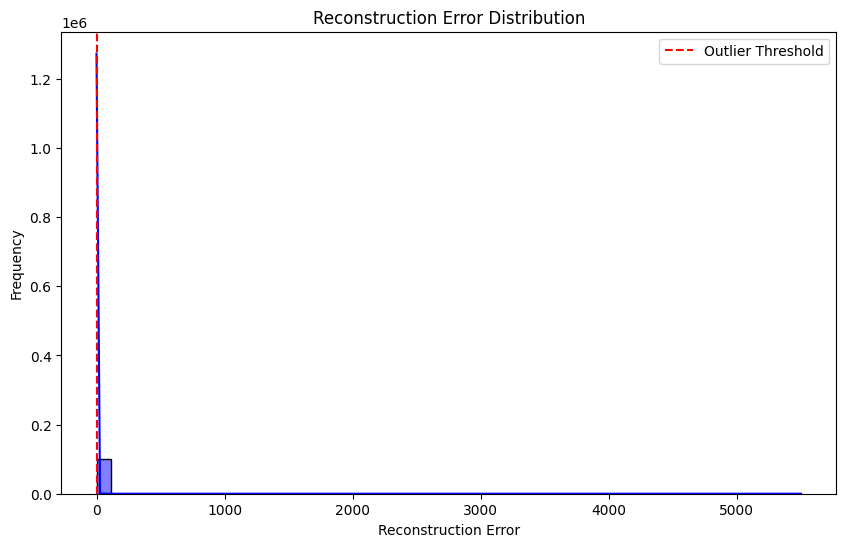

In [33]:
# Visualization of Reconstruction Errors
plt.figure(figsize=(10, 6))
sns.histplot(mse, bins=50, kde=True, color='blue')
plt.axvline(thresh, color='red', linestyle='--', label='Outlier Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

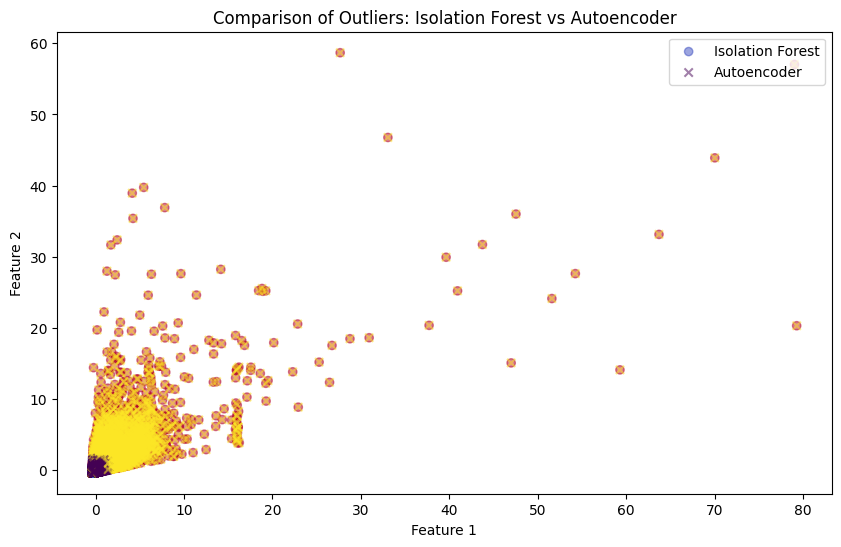

In [34]:
# Compare Outliers from Both Methods
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Outlier'], cmap='coolwarm', alpha=0.5, label='Isolation Forest')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Autoencoder_Outlier'], cmap='viridis', alpha=0.5, label='Autoencoder', marker='x')
plt.title('Comparison of Outliers: Isolation Forest vs Autoencoder')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [37]:
data=pd.read_csv('Dl_Project/Healthcare Providers.csv')

In [38]:
selected_columns = [
    'Number of Services',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Allowed Amount'
]

In [39]:
billing_anomaly_df=data[selected_columns].copy()

In [40]:
for col in selected_columns:
    billing_anomaly_df[col] = pd.to_numeric(
        billing_anomaly_df[col].astype(str).str.replace(',', ''), errors='coerce'
    )

In [41]:
billing_anomaly_df['Charge_to_Payment_Ratio'] = billing_anomaly_df['Average Submitted Charge Amount'] / \
                                               billing_anomaly_df['Average Medicare Payment Amount']


In [42]:
billing_anomaly_df

,Number of Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Allowed Amount,Charge_to_Payment_Ratio
0,27.0,305.211111,157.262222,200.587778,1.940778
1,175.0,548.800000,118.830000,123.730000,4.618362
2,32.0,155.000000,64.439688,90.650000,2.405350
3,20.0,5.000000,3.430000,3.500000,1.457726
4,33.0,40.000000,19.539394,26.520000,2.047146
...,...,...,...,...,...
99995,20.0,214.000000,60.725500,85.372500,3.524055
99996,136.0,144.051471,30.006176,61.270000,4.800727
99997,11.0,109.545455,14.090000,17.980000,7.774695
99998,12.0,65.000000,29.930000,30.540000,2.171734


In [43]:
X_train,X_val=train_test_split(billing_anomaly_df,test_size=0.2,random_state=42)

In [44]:
input_dim=X_train.shape[1]

Epoch 1/100


D:\anaconda\envs\DL_Project\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1415885.7500 - val_loss: 1494955.0000
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 850353.8750 - val_loss: 1307762.7500
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 818725.4375 - val_loss: 1133843.2500
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 820322.7500 - val_loss: 997474.3125
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 668959.7500 - val_loss: 850193.3125
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 579220.8750 - val_loss: 711438.1875
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 489924.0312 - val_loss: 576134.9375
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 439909.8438 - val_loss: 451637.7500
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 325234.5938 - val_loss: 339737.0000
Epoch 10/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 443598.5625 - val_loss: 255348.0938
Epoch 11/100
625/625 ━━━━━━━━━━━━━━━━

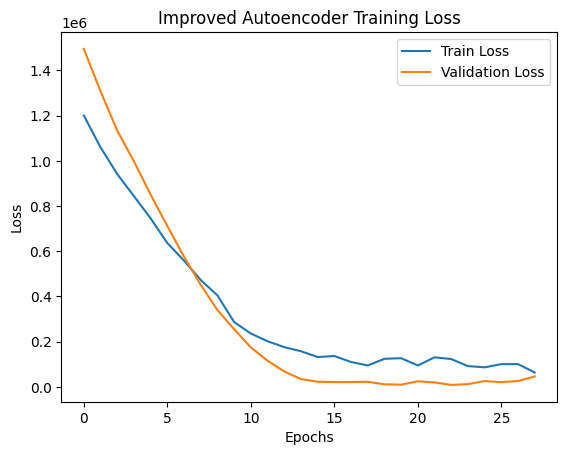

In [45]:
autoencoder = Sequential([
    # Encoder
    Dense(16, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
    Dropout(0.1),  # Dropout to prevent overfitting
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),  # Bottleneck

    # Decoder
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')  # Reconstruction layer
])

# Step 3: Compile the Model
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Step 4: Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 5: Train the Model
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
    verbose=1
)

# Step 6: Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Improved Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
reconstrcuted=autoencoder.predict(billing_anomaly_df)
reconstruction_error=np.mean(np.square(billing_anomaly_df - reconstrcuted),axis=1)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 717us/step


In [47]:
threshold = np.percentile(reconstruction_error, 95)
print(f"Anomaly Threshold (95th percentile): {threshold:.4f}")

Anomaly Threshold (95th percentile): 13319.9617


In [48]:
billing_anomaly_df['Reconstruction_Error'] = reconstruction_error
billing_anomaly_df['Anomaly'] = reconstruction_error > threshold

In [49]:
print(f"Number of anomalies detected: {billing_anomaly_df['Anomaly'].sum()}")

Number of anomalies detected: 5000


In [50]:
billing_anomaly_df.sample(20)

,Number of Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Allowed Amount,Charge_to_Payment_Ratio,Reconstruction_Error,Anomaly
28425,100.0,196.080000,56.073600,72.968000,3.496833,1892.698190,False
29628,13.0,368.153846,153.688462,246.144615,2.395455,6714.620371,False
84092,65.0,194.000000,76.382000,128.710000,2.539865,2400.091440,False
69506,12.0,252.000000,33.356667,46.305000,7.554712,100.154051,False
61333,83.0,80.409639,14.265301,18.442530,5.636729,260.452008,False
79936,65.0,603.846154,182.404000,238.389538,3.310487,4453.530292,False
61322,40.0,7.000000,1.322750,1.826000,5.292005,11.888282,False
42797,15.0,401.000000,102.946667,140.690000,3.895221,999.674198,False
24918,17.0,172.000000,28.852941,41.710000,5.961264,78.507450,False
58632,26.0,116.000000,39.420000,50.280000,2.942669,303.829852,False


In [51]:
print("\nTop anomalies based on reconstruction error:")
print(billing_anomaly_df[billing_anomaly_df['Anomaly'] == True]
      .sort_values(by='Reconstruction_Error', ascending=False)
      .head())


Top anomalies based on reconstruction error:
       Number of Services  Average Submitted Charge Amount  \
2247                 13.0                     21941.000000   
8526                 28.0                     15354.000000   
97337               154.0                     35573.895455   
99932                16.0                     47000.000000   
53206                16.0                     16392.000000   

       Average Medicare Payment Amount  Average Medicare Allowed Amount  \
2247                      16067.300000                     20494.000000   
8526                      12037.540000                     15354.000000   
97337                     12584.713896                     16488.868117   
99932                     14200.390000                     18112.740000   
53206                      9556.070000                     12188.860000   

       Charge_to_Payment_Ratio  Reconstruction_Error  Anomaly  
2247                  1.365569          7.711852e+07     True  
85

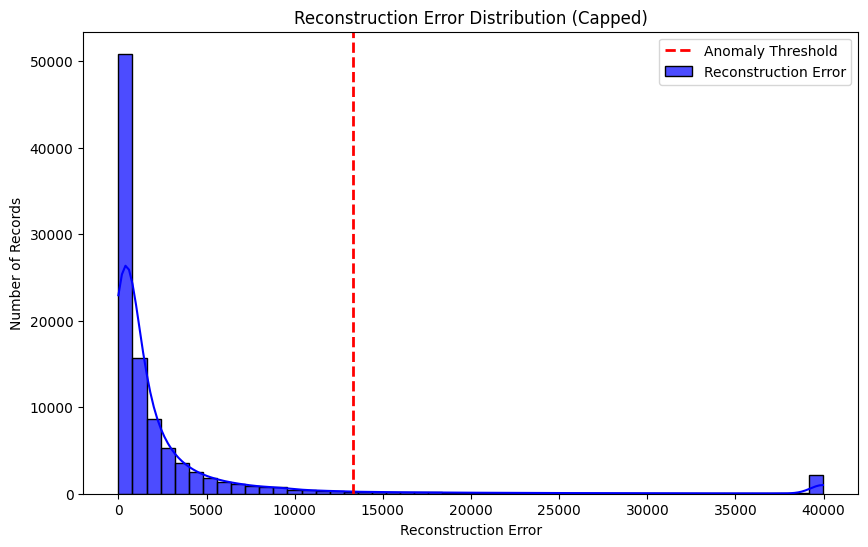

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved Plot for Reconstruction Error Distribution
plt.figure(figsize=(10, 6))

# Cap reconstruction errors for visualization
capped_errors = np.clip(reconstruction_error, a_min=None, a_max=threshold * 3)

# Plot Histogram with Capped Values
sns.histplot(capped_errors, bins=50, kde=True, color='blue', alpha=0.7, label='Reconstruction Error')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Anomaly Threshold')

# Customize plot
plt.title("Reconstruction Error Distribution (Capped)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Records")
plt.legend()
plt.show()


In [53]:
billing_anomaly_df.sample(10)

,Number of Services,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Allowed Amount,Charge_to_Payment_Ratio,Reconstruction_Error,Anomaly
34258,50.0,18.2,6.089600,8.820000,2.988702,38.601484,False
96417,20.0,36.0,17.340000,17.690000,2.076125,114.012987,False
56003,86.0,493.0,102.207093,137.750930,4.823540,1655.248760,False
35233,1491.6,17.6,6.142076,7.834299,2.865481,195.601155,False
27386,38.0,344.0,155.357105,199.970000,2.214253,4883.908137,False
38721,120.0,525.0,165.222333,218.420417,3.177537,5743.333729,False
57625,15.0,2500.0,1709.778000,2225.352667,1.462178,860245.702976,True
49043,20.0,139.0,114.400000,116.730000,1.215035,3081.171114,False
99441,199.0,455.0,101.461809,129.981206,4.484446,6393.345379,False
19725,58.0,10.0,1.813103,3.174828,5.515405,22.212360,False
